In [8]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def read_analysis(path):
    f = open(path).readlines()
    return float(f[-1].split()[-1])

def read_local(path):
    f = open(path).readlines()
    n_lines = int(f[0])
    local_coords = f[2:2+n_lines]
    return [format_local(_) for _ in local_coords]

def format_local(a):
    a = a.split()
    return [str(a[0]), float(a[1]), float(a[2]), float(a[3]), float(a[4])]

directory = "ester_t3_0"

def get_local(directory):
    errors = []
    subdirs = os.listdir(directory)

    for subd in subdirs:
        
        local_files = [x for x in os.listdir(os.path.join(directory, subd)) if x.startswith("local")]
        
        p = os.path.join(directory, subd, local_files[-1])
        try:
            errors.append(read_local(p))
        except Exception as e:
            print(p, e)
            pass
    return errors

def get_error(directory):
    errors = []
    subdirs = os.listdir(directory)

    for subd in subdirs:
        p = os.path.join(directory, subd, "GD.log")
        try:
            errors.append(read_analysis(p))
        except Exception as e:
            print(p, e)
            pass
    return errors

def make_dataframe(directory):
    dict_list = []
    error = get_error(directory)
    local = get_local(directory)
    jobs = len(error)
    #assert jobs == len(local), f"Number of local coordinates ({len(local)}) does not match number of error points ({len(error)})."
    for i in range(jobs):
        _ = {}
        _["frame"] = i
        _["error"] = error[i]
        l = local[i]
        for i in range(len(l)):
            _[f"x_c{i}"] = l[i][1]
            _[f"y_c{i}"] = l[i][2]
            _[f"z_c{i}"] = l[i][3]
            _[f"q_c{i}"] = l[i][4]
        dict_list.append(_)
    return pd.DataFrame(dict_list)
            


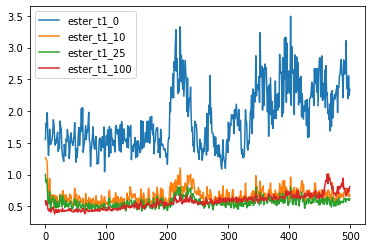

ester_t2_100/frame_491/GD.log list index out of range
ester_t2_100/frame_491/GD.log list index out of range


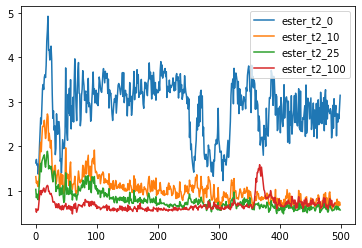

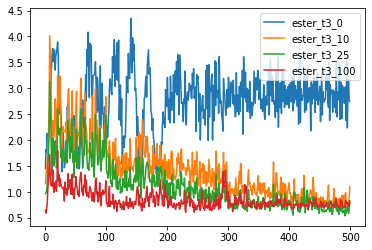

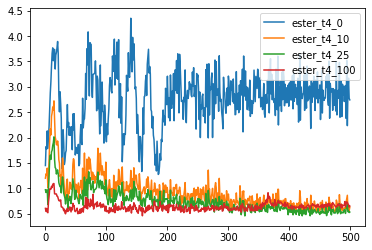

In [9]:
for trajectory in range(1,5):
    job = f"ester_t{trajectory}_0"
    plt.plot(get_error(job), label=job)
    df = make_dataframe(job)
    df.to_csv(job+".csv", index=False)
    
    job = f"ester_t{trajectory}_10"
    plt.plot(get_error(job), label=job)
    df = make_dataframe(job)
    df.to_csv(job+".csv", index=False)
    
    job = f"ester_t{trajectory}_25"
    plt.plot(get_error(job), label=job)
    df = make_dataframe(job)
    df.to_csv(job+".csv", index=False)
    
    job = f"ester_t{trajectory}_100"
    plt.plot(get_error(job), label=job)
    df = make_dataframe(job)
    df.to_csv(job+".csv", index=False)
    
    plt.legend()
    plt.show()
